## PACKAGES

In [1]:
# Import Packages

import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import matplotlib.pyplot as plt; plt.rcdefaults()

## From the NCEI Hourly Precipitation Data 
## (https://www.ncei.noaa.gov/data/coop-hourly-precipitation/v2/) 
## download the data file for the Curwensville Lake station.

## DATA FRAME DF 

In [2]:
source_file = 'Curwensville_Lake_station.xlsx'

df = pd.read_excel(source_file)

# with pd.option_context("display.max_columns", None):
#     display(df)

# Create a graphical representation of average total rainfall by month for all the years covered by the dataset. 

## DATA MANIPULATION

In [3]:
first_task = df.drop(df.iloc[:, 0:5], axis = 1)
# first_task.head()

In [4]:
first_task = first_task.drop([x for x in first_task if x.endswith('MF')], 1)
first_task = first_task.drop([x for x in first_task if x.endswith('QF')], 1)
first_task = first_task.drop([x for x in first_task if x.endswith('S1')], 1)
first_task = first_task.drop([x for x in first_task if x.endswith('S2')], 1)

first_task.head()

DATE  HR00Val  HR01Val  HR02Val  HR03Val  HR04Val  HR05Val  HR06Val  \
0 1969-07-01       10        1        1        0        0        0        0   
1 1969-07-02        0        0        0        0        0        0        0   
2 1969-07-03        0        0        0        0        0        0        0   
3 1969-07-04        0        0        0        0        0        0        0   
4 1969-07-05        1        1        7        7       21       10        2   

   HR07Val  HR08Val  ...  HR15Val  HR16Val  HR17Val  HR18Val  HR19Val  \
0        0        0  ...        0        0        0        0        0   
1        0        0  ...        0        0        0        0        0   
2        0        0  ...        0        0        0        0        0   
3        0        0  ...        0        0        0        0        0   
4        0        1  ...        0        0        0        0        0   

   HR20Val  HR21Val  HR22Val  HR23Val  DlySum  
0        0        0        0        0      12  
1        0        0        0        0       0  
2        0        0        0        0       0  
3        0        5       49        6      60  
4        0        0        0        0      74  

[5 rows x 26 columns]

In [5]:
first_task.iloc[:, 1:-1] = first_task.iloc[:, 1:-1].replace([-9999],0)

In [6]:
with pd.option_context("display.max_columns", None):
    display(first_task)

DATE  HR00Val  HR01Val  HR02Val  HR03Val  HR04Val  HR05Val  \
0     1969-07-01       10        1        1        0        0        0   
1     1969-07-02        0        0        0        0        0        0   
2     1969-07-03        0        0        0        0        0        0   
3     1969-07-04        0        0        0        0        0        0   
4     1969-07-05        1        1        7        7       21       10   
...          ...      ...      ...      ...      ...      ...      ...   
15309 2021-02-19        0        0        0        0        0        0   
15310 2021-02-20        0        0        0        0        0        0   
15311 2021-02-21        0        0        0        0        0        0   
15312 2021-02-22        0        0        0        0        0        0   
15313 2021-02-23        0        0        0        0        0        0   

       HR06Val  HR07Val  HR08Val  HR09Val  HR10Val  HR11Val  HR12Val  HR13Val  \
0            0        0        0        0        0        0        0        0   
1            0        0        0        0        0        0        0        0   
2            0        0        0        0        0        0        0        0   
3            0        0        0        0        0        0        0        0   
4            2        0        1       18        6        0        0        0   
...        ...      ...      ...      ...      ...      ...      ...      ...   
15309        0        0        0        0        0        0        0        0   
15310        0        0        0        0        0        0        0        0   
15311        0        0        0        1        0        4        2        0   
15312        0        0        0        0        0        0        0        0   
15313        0        0        0        0        4        2        0        0   

       HR14Val  HR15Val  HR16Val  HR17Val  HR18Val  HR19Val  HR20Val  HR21Val  \
0            0        0        0        0        0        0        0        0   
1            0        0        0        0        0        0        0        0   
2            0        0        0        0        0        0        0        0   
3            0        0        0        0        0        0        0        5   
4            0        0        0        0        0        0        0        0   
...        ...      ...      ...      ...      ...      ...      ...      ...   
15309        0        0        0        0        0        0        0        0   
15310        2        0        0        0        0        0        0        0   
15311        0        0        0        0        0        0        0        0   
15312        0        0        7       14        6        3        2        1   
15313        0        0        0        0        0        0        0        0   

       HR22Val  HR23Val  DlySum  
0            0        0      12  
1            0        0       0  
2            0        0       0  
3           49        6      60  
4            0        0      74  
...        ...      ...     ...  
15309        0        0       0  
15310        0        0       2  
15311        0        0       7  
15312        0        0      33  
15313        0        0       6  

[15314 rows x 26 columns]

In [7]:
first_task.iloc[:, 1:-1] = first_task.iloc[:, 1:-1].astype(int)

first_task['Check'] =  first_task.iloc[:, 1:-1].sum(axis=1, skipna=True)

# with pd.option_context("display.max_columns", None):
#     display(first_task)

In [8]:
prova = first_task.groupby(pd.Grouper(key='DATE',axis=0,freq='M')).mean()

## VISUALISATIONS AND OUTLIERS

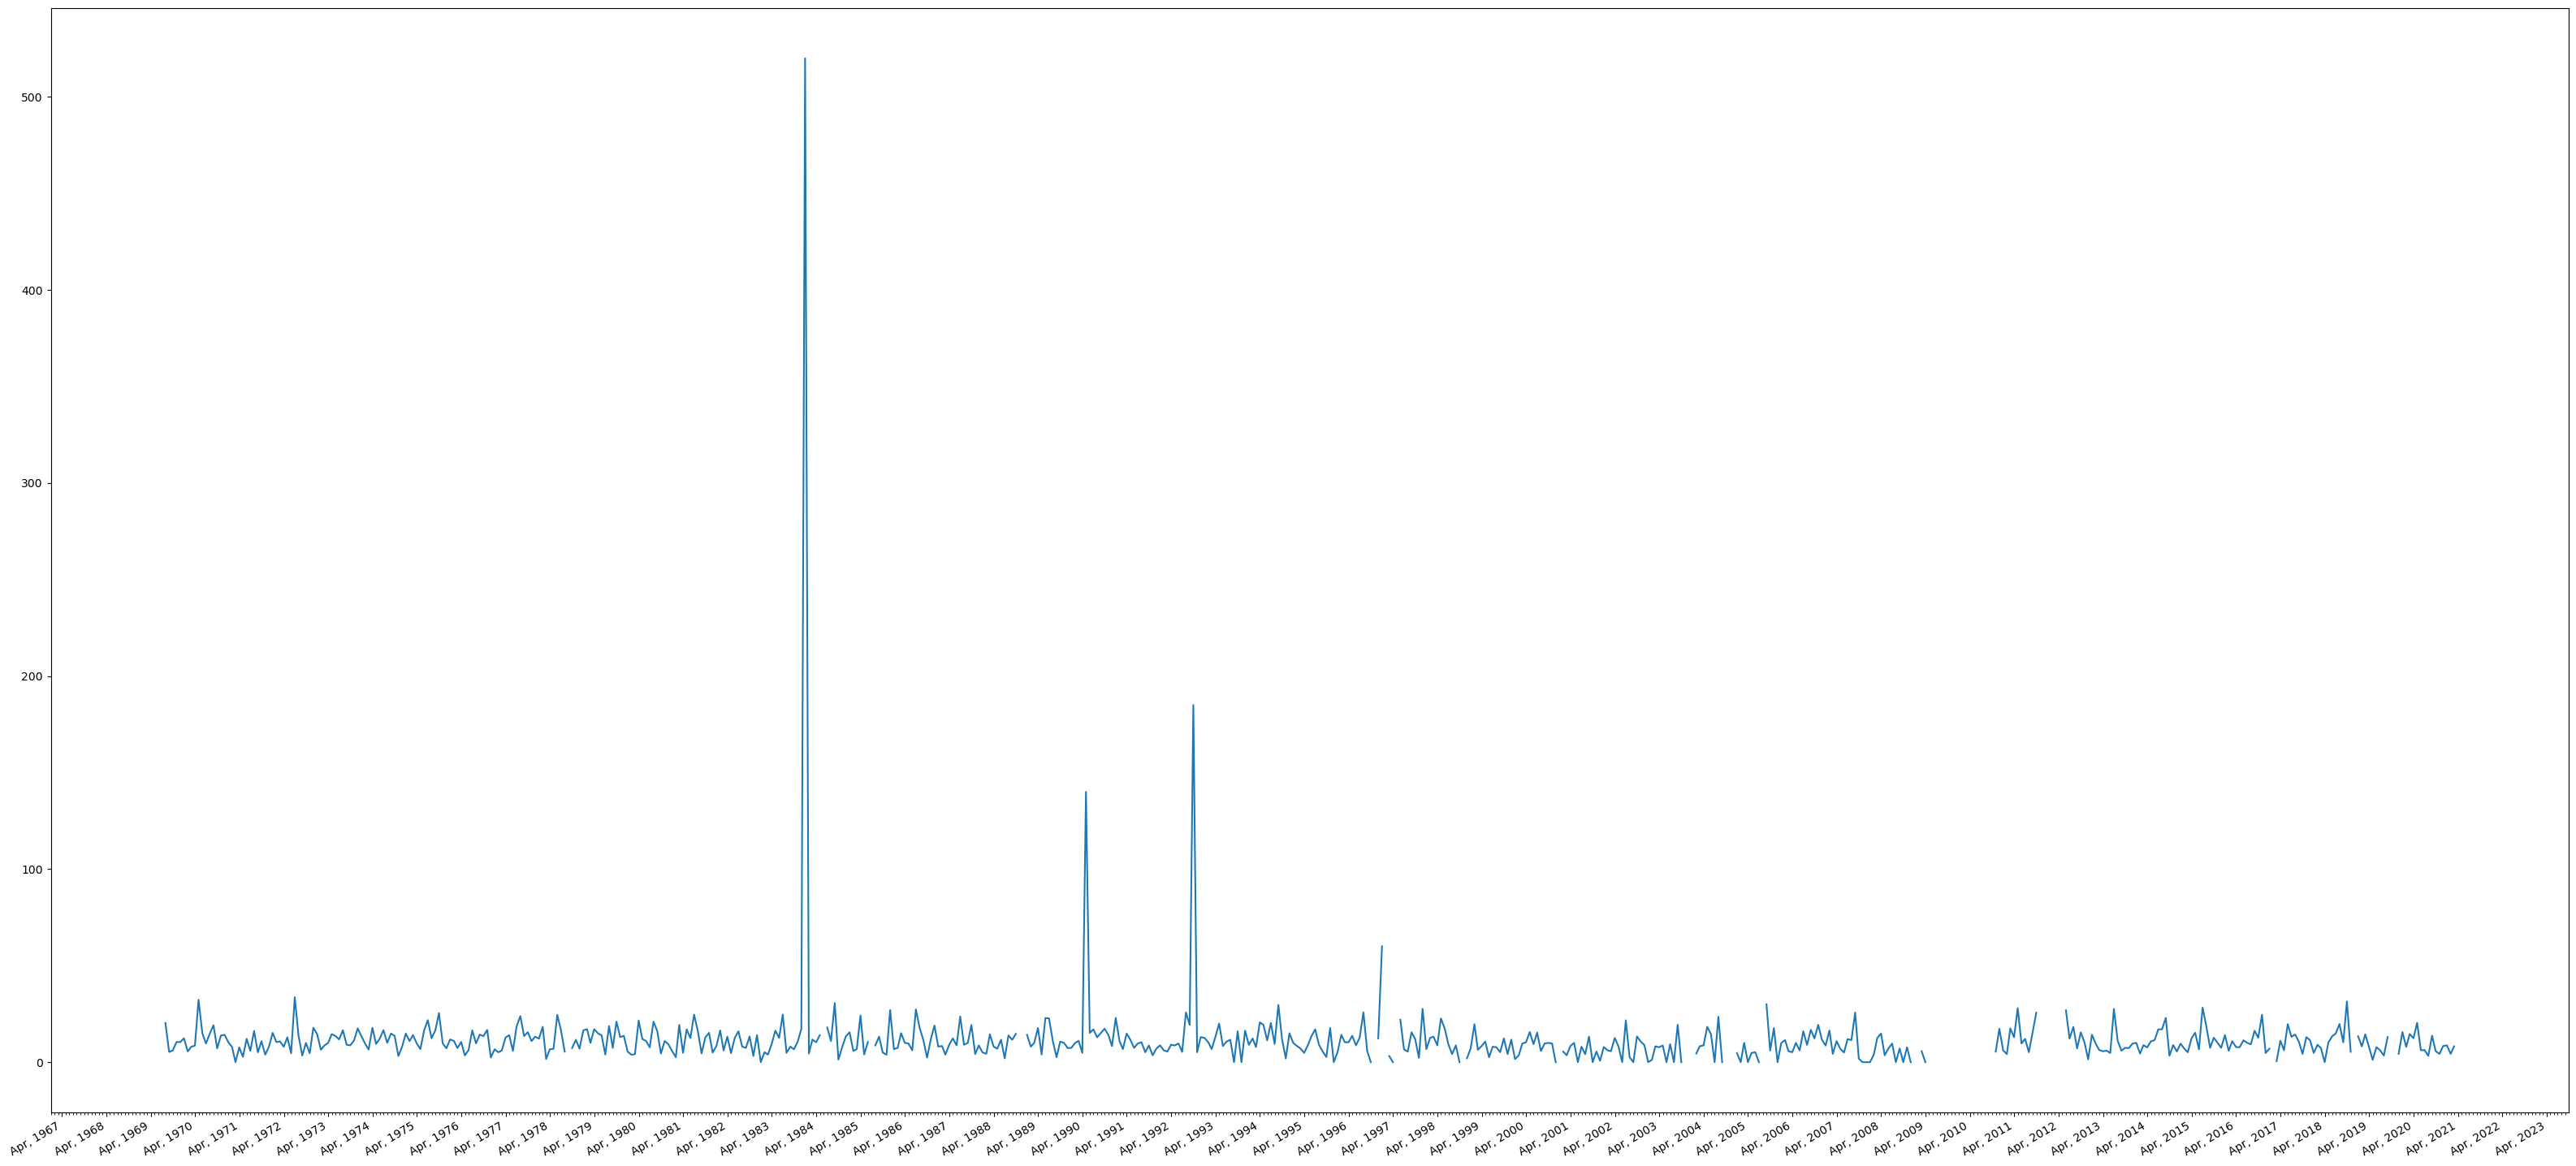

In [9]:
# Visualisation

fig, ax = plt.subplots(figsize=(40, 20))

half_year_locator = mdates.MonthLocator(interval=12)
#year_month_formatter = mdates.DateFormatter("%Y-%m") # four digits for year, two for month
month_year_formatter = mdates.DateFormatter('%b, %Y') # The "," is intentional.


monthly_locator = mdates.MonthLocator()
ax.xaxis.set_major_locator(half_year_locator)
ax.xaxis.set_minor_locator(monthly_locator)
ax.xaxis.set_major_formatter(month_year_formatter)


fig.autofmt_xdate()

ax.plot(prova.index.values, prova.Check);


In [10]:
# CHECKING OUTLIERS
px.box(prova.Check, y='Check', points='all', title='Check value distribution across dataset')

In [11]:
# REMOVING OUTLIERS

# removing those who are unlikely to be real
prova = prova[prova['Check'] <= 100]
# prova.Check.describe()

# checking again the distribution
px.box(prova.Check, y='Check', points='all', title='Check value distribution across dataset')


In [12]:
#to make sure we remove 60 as well
prova = prova[prova['Check'] < 60]
px.box(prova.Check, y='Check', points='all', title='Check value distribution across dataset') # it looks fine now

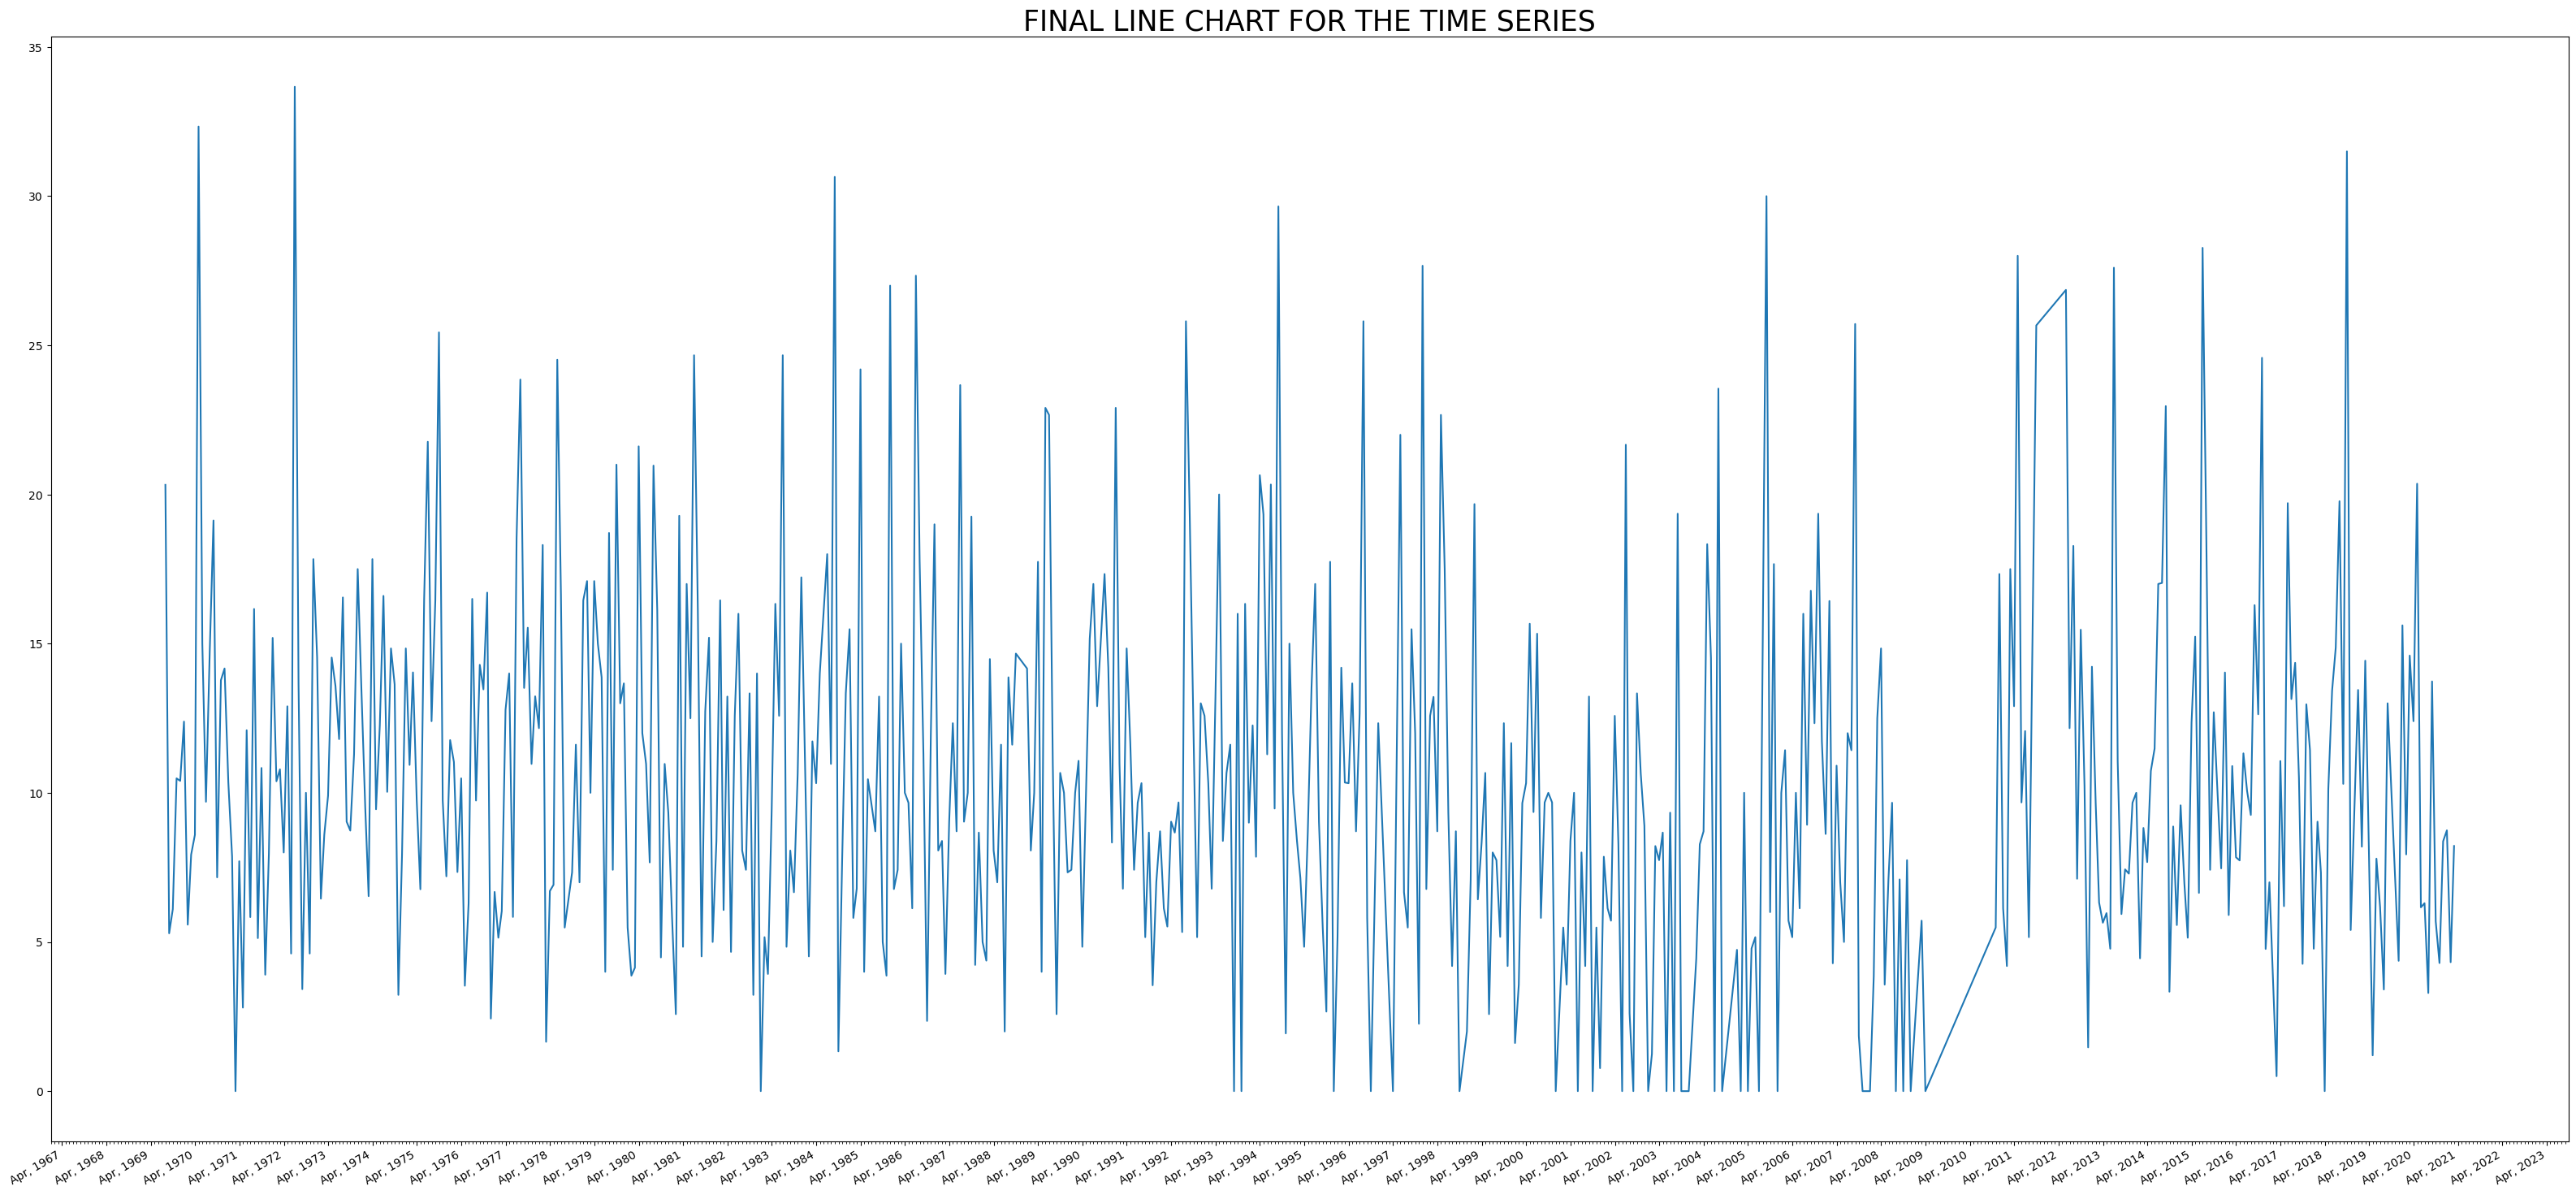

In [13]:
# CHECKING FINAL LINE CHART FOR THE TIME SERIES

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(40, 20))

half_year_locator = mdates.MonthLocator(interval=12)
#year_month_formatter = mdates.DateFormatter("%Y-%m") # four digits for year, two for month
month_year_formatter = mdates.DateFormatter('%b, %Y') # The "," is intentional.


monthly_locator = mdates.MonthLocator()
ax.xaxis.set_major_locator(half_year_locator)
ax.xaxis.set_minor_locator(monthly_locator)
ax.xaxis.set_major_formatter(month_year_formatter)

ax.set_title('FINAL LINE CHART FOR THE TIME SERIES', fontsize=25)
fig.autofmt_xdate()

ax.plot(prova.index.values, prova.Check);

## Include an indication of the variation in the data for each month.

In [14]:
variance = prova[['Check']]
variance.reset_index(level=0, inplace=True)
variance.head()

DATE      Check
0 1969-07-31  20.322581
1 1969-08-31   5.290323
2 1969-09-30   6.100000
3 1969-10-31  10.483871
4 1969-11-30  10.400000

In [15]:
variance_join = prova[['Check']]
variance_join.reset_index(level=0, inplace=True)
variance_join.index = variance_join.index + 1
variance_join.head()

DATE      Check
1 1969-07-31  20.322581
2 1969-08-31   5.290323
3 1969-09-30   6.100000
4 1969-10-31  10.483871
5 1969-11-30  10.400000

In [16]:
delta = variance.join(variance_join, how='left', lsuffix='_Current_day', rsuffix='_Previuos_day', sort=False)
# delta.head()
delta['variance_month_by_month'] = delta['Check_Current_day'] - delta['Check_Previuos_day'] 
delta.head()

DATE_Current_day  Check_Current_day DATE_Previuos_day  Check_Previuos_day  \
0       1969-07-31          20.322581               NaT                 NaN   
1       1969-08-31           5.290323        1969-07-31           20.322581   
2       1969-09-30           6.100000        1969-08-31            5.290323   
3       1969-10-31          10.483871        1969-09-30            6.100000   
4       1969-11-30          10.400000        1969-10-31           10.483871   

   variance_month_by_month  
0                      NaN  
1               -15.032258  
2                 0.809677  
3                 4.383871  
4                -0.083871

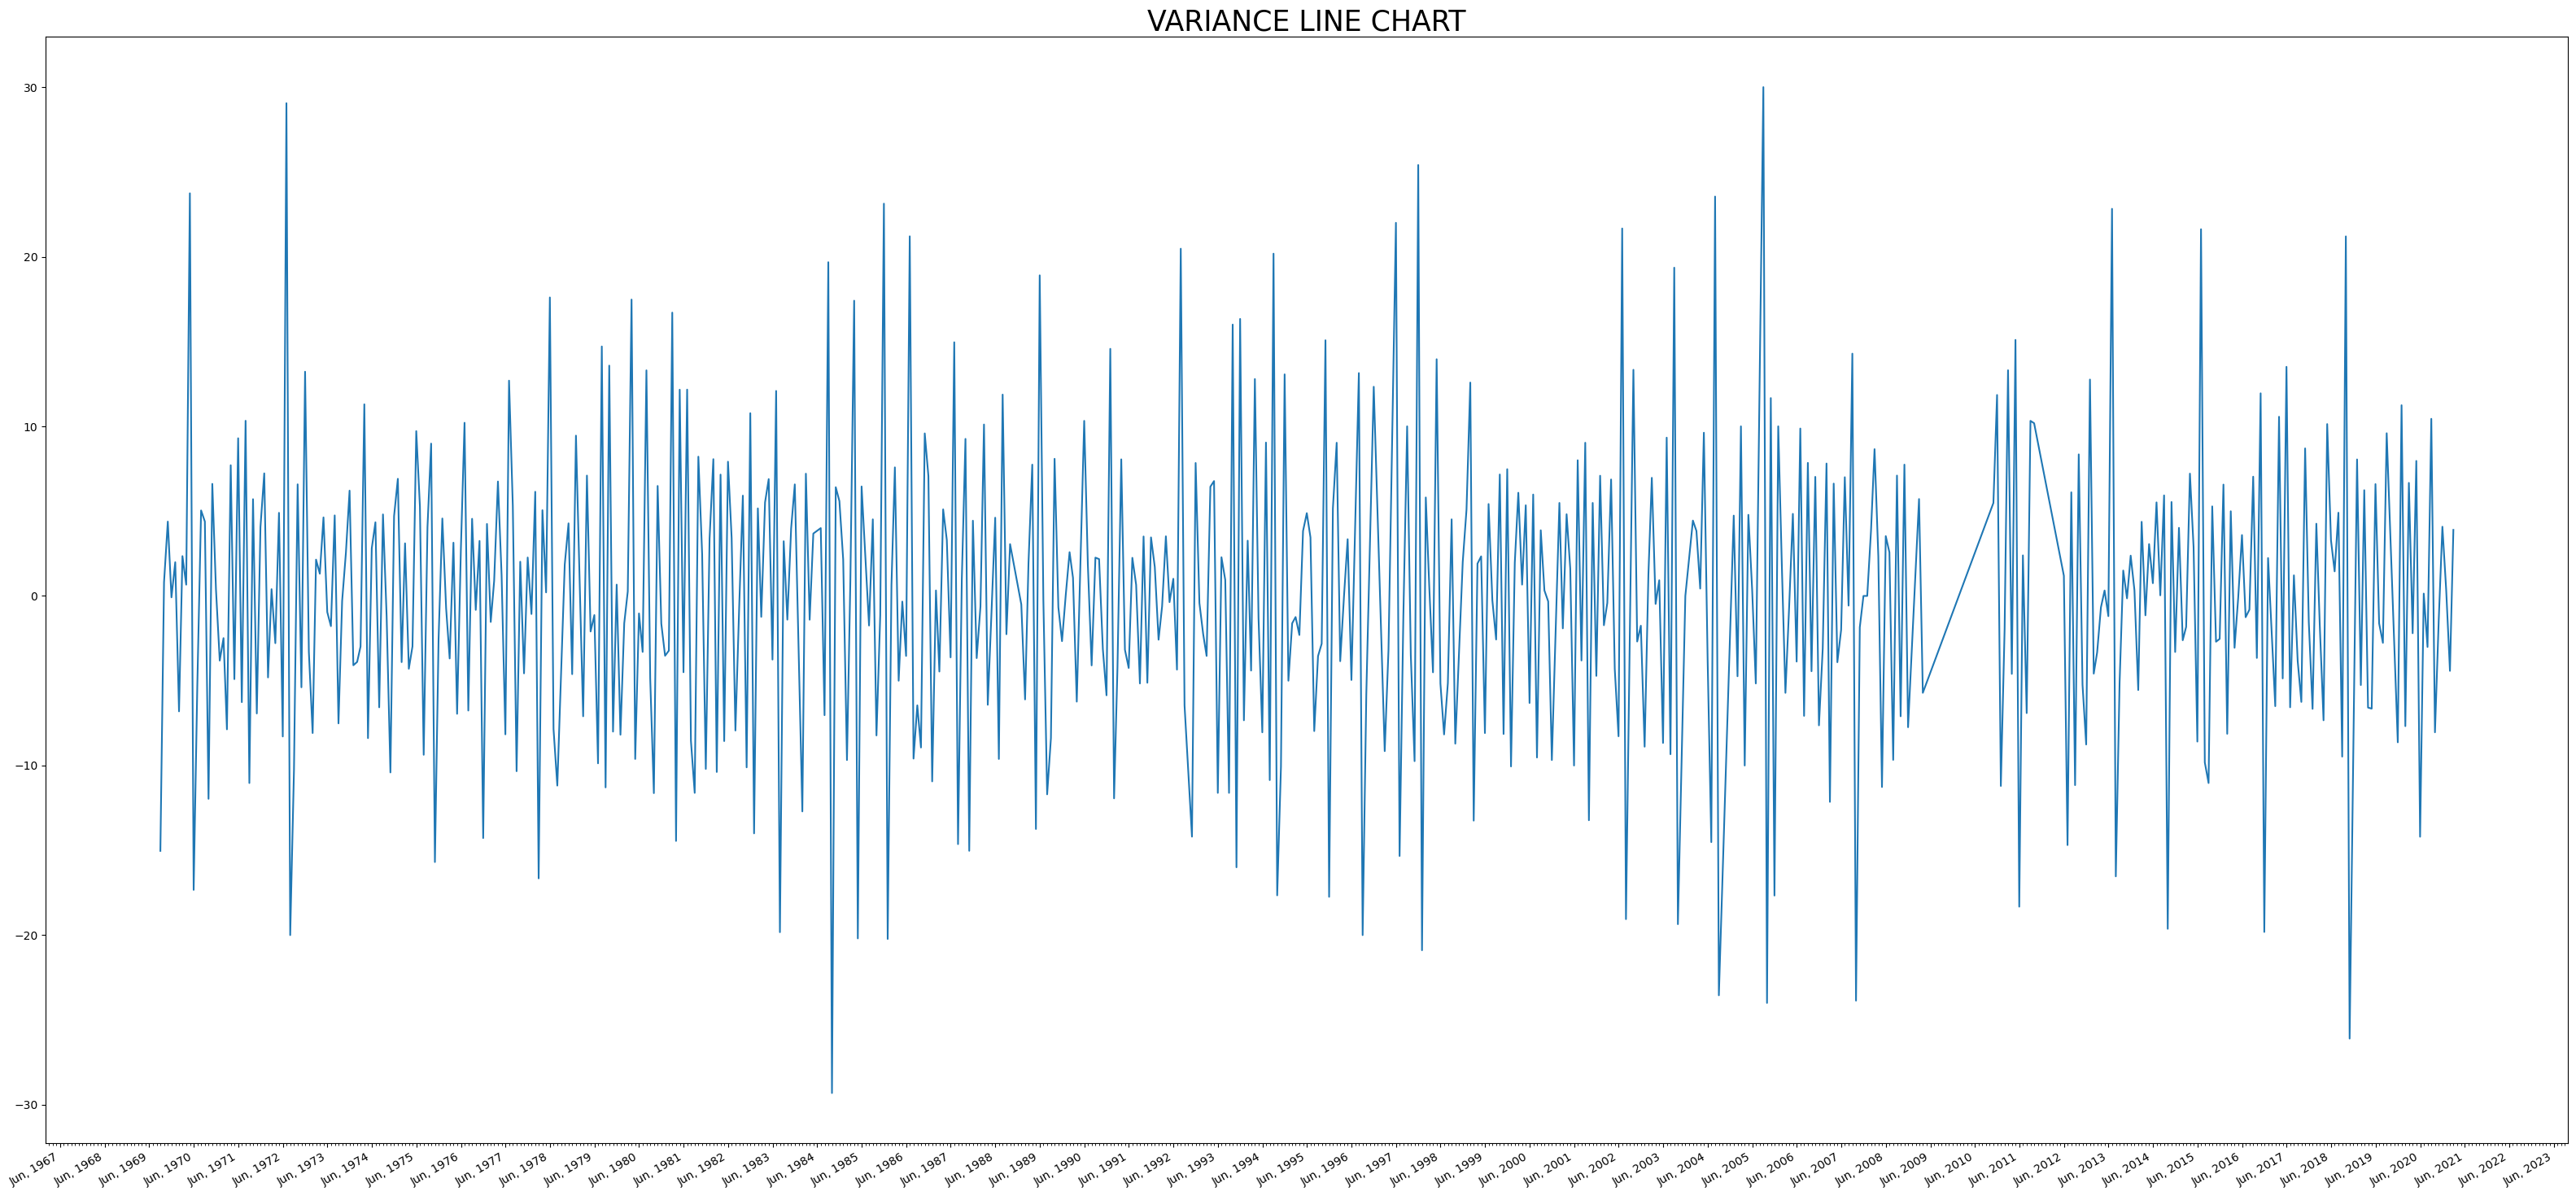

In [17]:
# VARIANCE LINE CHART

fig, ax = plt.subplots(figsize=(40, 20))

half_year_locator = mdates.MonthLocator(interval=12)
#year_month_formatter = mdates.DateFormatter("%Y-%m") # four digits for year, two for month
month_year_formatter = mdates.DateFormatter('%b, %Y') # The "," is intentional.


monthly_locator = mdates.MonthLocator()
ax.xaxis.set_major_locator(half_year_locator)
ax.xaxis.set_minor_locator(monthly_locator)
ax.xaxis.set_major_formatter(month_year_formatter)

ax.set_title('VARIANCE LINE CHART', fontsize=25)
fig.autofmt_xdate()

ax.plot(delta.DATE_Current_day, delta.variance_month_by_month);

## CALCULATE THE PROBABILITY OF RAINFALL BETWEEN 7AM AND 8AM.

Groundhog Day (Pennsylvania German: Grund'sau dåk, Grundsaudaag, Grundsow Dawg, Murmeltiertag; Nova Scotia: Daks Day)[1] is a popular North American tradition observed in the United States and Canada on February 2. It derives from the Pennsylvania Dutch superstition that if a groundhog emerges from its burrow on this day and sees its shadow due to clear weather, it will retreat to its den, and winter will go on for six more weeks; if it does not see its shadow because of cloudiness, spring will arrive early.

While the tradition remains popular in the 21st century, studies have found no consistent association between a groundhog seeing its shadow and the subsequent arrival time of spring-like weather.[2]

The weather lore was brought from German-speaking areas where the badger (German: Dachs) is the forecasting animal. This appears to be an enhanced version of the lore that clear weather on the Christian festival of Candlemas forebodes a prolonged winter.

The Groundhog Day ceremony held at Punxsutawney in western Pennsylvania, centering on a semi-mythical groundhog named Punxsutawney Phil, has become the most frequently attended ceremony. Grundsow Lodges in Pennsylvania Dutch Country in the southeastern part of the state observe the occasion as well. Other cities in the United States and Canada also have adopted the event.

In [18]:
# CALCULATE THE PROBABILITY OF RAINFALL BETWEEN 7AM AND 8AM (HR07Val) EVERY 2/2
second_task = df[['DATE', 'HR07Val']]

with pd.option_context("display.max_columns", None):
    display(second_task)

DATE  HR07Val
0     1969-07-01        0
1     1969-07-02        0
2     1969-07-03        0
3     1969-07-04        0
4     1969-07-05        0
...          ...      ...
15309 2021-02-19        0
15310 2021-02-20        0
15311 2021-02-21        0
15312 2021-02-22        0
15313 2021-02-23        0

[15314 rows x 2 columns]

In [19]:
second_task['year_of_date'] = second_task['DATE'].dt.year
second_task['month_of_date'] = second_task['DATE'].dt.month
second_task['day_of_date'] = second_task['DATE'].dt.day
second_task.head()

<ipython-input-19-d39fa9b0b8af>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-19-d39fa9b0b8af>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-19-d39fa9b0b8af>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



DATE  HR07Val  year_of_date  month_of_date  day_of_date
0 1969-07-01        0          1969              7            1
1 1969-07-02        0          1969              7            2
2 1969-07-03        0          1969              7            3
3 1969-07-04        0          1969              7            4
4 1969-07-05        0          1969              7            5

In [20]:
# REDUCE RESULTS
only_2nd_Feb = second_task[second_task['day_of_date'] == 2 ]
only_2nd_Feb = only_2nd_Feb[only_2nd_Feb['month_of_date'] == 2 ]
only_2nd_Feb.head()

DATE  HR07Val  year_of_date  month_of_date  day_of_date
216  1970-02-02        0          1970              2            2
552  1971-02-02        0          1971              2            2
857  1972-02-02        0          1972              2            2
1215 1973-02-02        3          1973              2            2
1531 1974-02-02        0          1974              2            2

In [21]:
with pd.option_context("display.max_columns", None):
    display(only_2nd_Feb)

DATE  HR07Val  year_of_date  month_of_date  day_of_date
216   1970-02-02        0          1970              2            2
552   1971-02-02        0          1971              2            2
857   1972-02-02        0          1972              2            2
1215  1973-02-02        3          1973              2            2
1531  1974-02-02        0          1974              2            2
1894  1975-02-02        0          1975              2            2
2257  1976-02-02        0          1976              2            2
2620  1977-02-02        0          1977              2            2
2961  1978-02-02        0          1978              2            2
3280  1979-02-02        0          1979              2            2
3634  1980-02-02        0          1980              2            2
3986  1981-02-02        0          1981              2            2
4334  1982-02-02        0          1982              2            2
4669  1983-02-02        0          1983              2            2
4979  1984-02-02        0          1984              2            2
5314  1985-02-02        0          1985              2            2
5640  1986-02-02        0          1986              2            2
5992  1987-02-02        0          1987              2            2
6308  1988-02-02       10          1988              2            2
6579  1989-02-02        0          1989              2            2
6914  1990-02-02        0          1990              2            2
7251  1991-02-02        0          1991              2            2
7616  1992-02-02        0          1992              2            2
7954  1993-02-02        0          1993              2            2
8258  1994-02-02        0          1994              2            2
8609  1995-02-02        0          1995              2            2
8945  1996-02-02        0          1996              2            2
9470  1998-02-02        0          1998              2            2
9748  1999-02-02        0          1999              2            2
10107 2000-02-02        0          2000              2            2
10413 2001-02-02        0          2001              2            2
10708 2002-02-02        0          2002              2            2
10964 2003-02-02        0          2003              2            2
11145 2004-02-02        0          2004              2            2
11319 2005-02-02        0          2005              2            2
11508 2006-02-02        0          2006              2            2
11843 2007-02-02        0          2007              2            2
12203 2009-02-02        0          2009              2            2
12355 2011-02-02       10          2011              2            2
12825 2013-02-02        0          2013              2            2
13190 2014-02-02        1          2014              2            2
13548 2015-02-02        6          2015              2            2
13913 2016-02-02        0          2016              2            2
14519 2018-02-02        0          2018              2            2
14778 2019-02-02        0          2019              2            2
14994 2020-02-02        0          2020              2            2
15292 2021-02-02        0          2021              2            2

In [22]:
# ADD EXTRA COLUMN FOR LABELLING IT
only_2nd_Feb.loc[only_2nd_Feb['HR07Val'] > 0, 'Rainfall'] = 'Rainy Day' 
only_2nd_Feb.loc[only_2nd_Feb['HR07Val'] == 0, 'Rainfall'] = 'Not Rainy or not detected' 

# with pd.option_context("display.max_columns", None):
#     display(only_2nd_Feb)

In [23]:
#pie chart function

def pie_chart(dataset,x,y,z):
  fig = px.pie(dataset[x].value_counts().reset_index(), values = x, names = 'index', width = 700, height = 700)
  fig.update_traces(textposition = 'inside', 
                    textinfo = 'percent + label', 
                    hole = y
                  , 
                    marker = dict(colors = ['#dd4124','#009473', '#336b87', '#b4b4b4'], 
                                  line = dict(color = 'white', width = 2)),
                    hovertemplate = 'Value: %{value}')

  fig.update_layout(annotations = [dict(text = z, 
                                        x = 0.51, y = 0.50, font_size = 20, showarrow = False, 
                                        
                                        font_color = 'black')],
                    showlegend = False)

                    
  fig.show()

In [24]:
pie_chart(only_2nd_Feb,'Rainfall', 0.4,  'Rainy or Not on  <br>the 2nd of Feb? <br>')

# THERE HAVE BEEN 10.6 % OF RAINY DAYS


## TRENDS IN RAINFALL AMOUNT OVER TIME. 

In [25]:
third_task = df.drop(df.iloc[:, 0:5], axis = 1)
# first_task.head()

In [26]:
third_task = third_task.drop([x for x in third_task if x.endswith('MF')], 1)
third_task = third_task.drop([x for x in third_task if x.endswith('QF')], 1)
third_task = third_task.drop([x for x in third_task if x.endswith('S1')], 1)
third_task = third_task.drop([x for x in third_task if x.endswith('S2')], 1)
third_task = third_task.drop([x for x in third_task if x.startswith('HR')], 1)

with pd.option_context("display.max_columns", None):
    display(third_task)

DATE  DlySum
0     1969-07-01      12
1     1969-07-02       0
2     1969-07-03       0
3     1969-07-04      60
4     1969-07-05      74
...          ...     ...
15309 2021-02-19       0
15310 2021-02-20       2
15311 2021-02-21       7
15312 2021-02-22      33
15313 2021-02-23       6

[15314 rows x 2 columns]

In [27]:
# REPLACE -9999
third_task['DlySum'] = third_task['DlySum'].replace([-9999],0)

In [28]:
third_task.head()

DATE  DlySum
0 1969-07-01      12
1 1969-07-02       0
2 1969-07-03       0
3 1969-07-04      60
4 1969-07-05      74

In [29]:
third_task['year_of_date'] = third_task['DATE'].dt.year
third_task['month_of_date'] = third_task['DATE'].dt.month
third_task['day_of_date'] = third_task['DATE'].dt.day
with pd.option_context("display.max_columns", None):
    display(third_task)

DATE  DlySum  year_of_date  month_of_date  day_of_date
0     1969-07-01      12          1969              7            1
1     1969-07-02       0          1969              7            2
2     1969-07-03       0          1969              7            3
3     1969-07-04      60          1969              7            4
4     1969-07-05      74          1969              7            5
...          ...     ...           ...            ...          ...
15309 2021-02-19       0          2021              2           19
15310 2021-02-20       2          2021              2           20
15311 2021-02-21       7          2021              2           21
15312 2021-02-22      33          2021              2           22
15313 2021-02-23       6          2021              2           23

[15314 rows x 5 columns]

In [30]:
third_task_YoY = third_task.groupby(pd.Grouper(key='year_of_date',axis=0)).mean()
third_task_MoM = third_task.groupby(pd.Grouper(key='month_of_date',axis=0)).mean()
third_task_DoD = third_task.groupby(pd.Grouper(key='day_of_date',axis=0)).mean()

In [31]:
third_task_DoD.head()

DlySum  year_of_date  month_of_date
day_of_date                                        
1             7.434066   1993.397436       6.441392
2            10.529528   1992.897638       6.342520
3            11.253438   1992.921415       6.353635
4            11.774067   1992.915521       6.339882
5             9.279528   1992.938976       6.358268

In [32]:
third_task_YoY = third_task_YoY.drop(third_task_YoY.iloc[:,-2:], axis = 1)
third_task_MoM = third_task_MoM.drop(third_task_MoM.iloc[:,-2:], axis = 1)
third_task_DoD = third_task_DoD.drop(third_task_DoD.iloc[:,-2:], axis = 1)

In [33]:
third_task_YoY.reset_index(level=0, inplace=True)
third_task_MoM.reset_index(level=0, inplace=True)
third_task_DoD.reset_index(level=0, inplace=True)

In [35]:
third_task_DoD.head()

day_of_date     DlySum
0            1   7.434066
1            2  10.529528
2            3  11.253438
3            4  11.774067
4            5   9.279528

## YEARS TREND

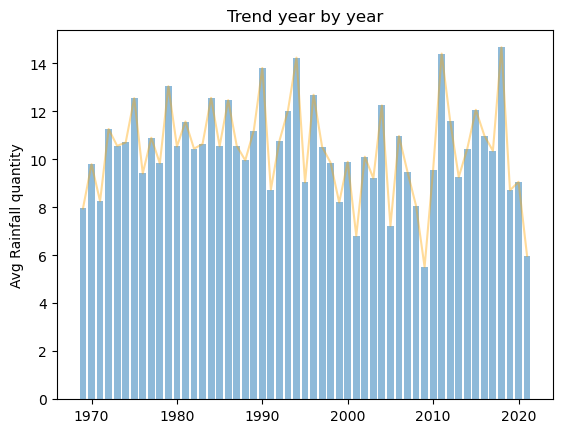

In [36]:
y_pos = third_task_YoY['year_of_date']
x_pos = third_task_YoY['DlySum']

plt.bar(y_pos, x_pos, align='center', alpha=0.5)
plt.plot(y_pos, x_pos, alpha=0.4, color='orange')

plt.ylabel('Avg Rainfall quantity')
plt.title('Trend year by year')

plt.show()

In [37]:
third_task_YoY['DlySum'].mean()

10.405593576072677

In [38]:
# ADD EXTRA COLUMN FOR LABELLING third_task_YoY
third_task_YoY.loc[third_task_YoY['DlySum'] >= 10.4, 'Rainfall'] = 'Rainy Month' 
third_task_YoY.loc[third_task_YoY['DlySum'] < 10.4, 'Rainfall'] = 'Not particularly Rainy Month' 

# with pd.option_context("display.max_columns", None):
#     display(third_task_MoM)

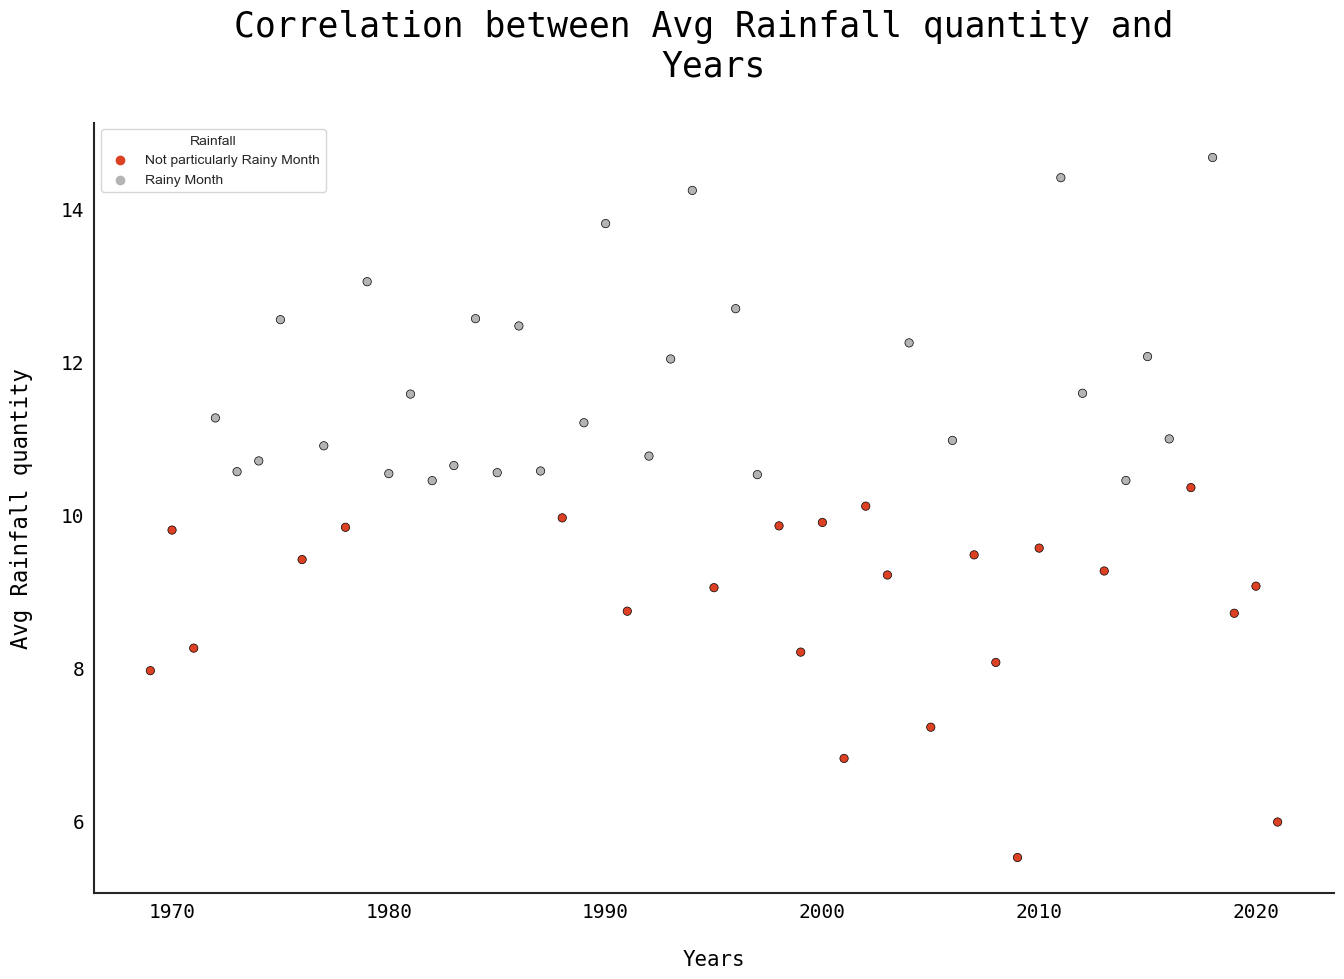

In [39]:
plt.figure(figsize = (16, 10))
sns.set_style("white")
plt.title('''Correlation between Avg Rainfall quantity and 
Years''', size = 25, y = 1.05, fontname = 'monospace', color = 'black', ha = 'center')
a = sns.scatterplot(data = third_task_YoY, x = "year_of_date", y = "DlySum", 
                    hue = "Rainfall", 
                    palette = ['#dd4124', '#b4b4b4'], #, '#009473', '#336b87'
                    sizes = (1, 7), linewidth = 0.5, edgecolor = "black")
plt.xticks(fontname = 'monospace', size = 14, color = 'black')
plt.yticks(fontname = 'monospace', size = 14, color = 'black')
plt.xlabel('Years', labelpad = 20, fontname = 'monospace', fontsize = 15, color = 'black')
plt.ylabel('Avg Rainfall quantity', labelpad = 20, fontname = 'monospace', fontsize = 16, color = 'black')


for j in ['right', 'top']:
        a.spines[j].set_visible(False)
for j in ['bottom', 'left']:
    a.spines[j].set_linewidth(1.5)
    
plt.show()

## MONTHS TREND

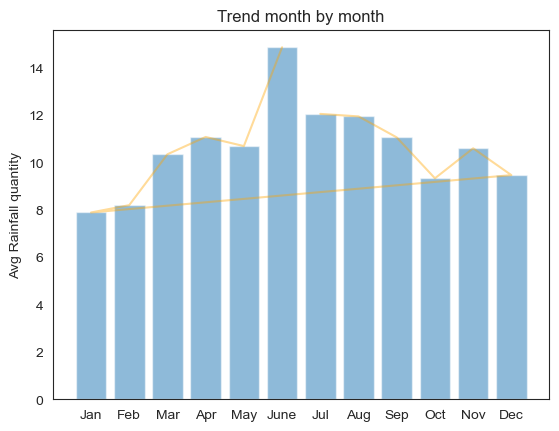

In [40]:
objects = ('Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'June')
y_pos = third_task_MoM['month_of_date']
x_pos = third_task_MoM['DlySum']

plt.bar(y_pos, x_pos, align='center', alpha=0.5)
plt.plot(y_pos, x_pos, alpha=0.4, color='orange')
plt.xticks(y_pos, objects)
plt.ylabel('Avg Rainfall quantity')
plt.title('Trend month by month')

plt.show()

In [41]:
third_task_MoM['DlySum'].mean()

10.63133679567167

In [42]:
# ADD EXTRA COLUMN FOR LABELLING third_task_MoM
third_task_MoM.loc[third_task_MoM['DlySum'] >= 10.6, 'Rainfall'] = 'Rainy Month' 
third_task_MoM.loc[third_task_MoM['DlySum'] < 10.6, 'Rainfall'] = 'Not particularly Rainy Month' 

# with pd.option_context("display.max_columns", None):
#     display(third_task_MoM)

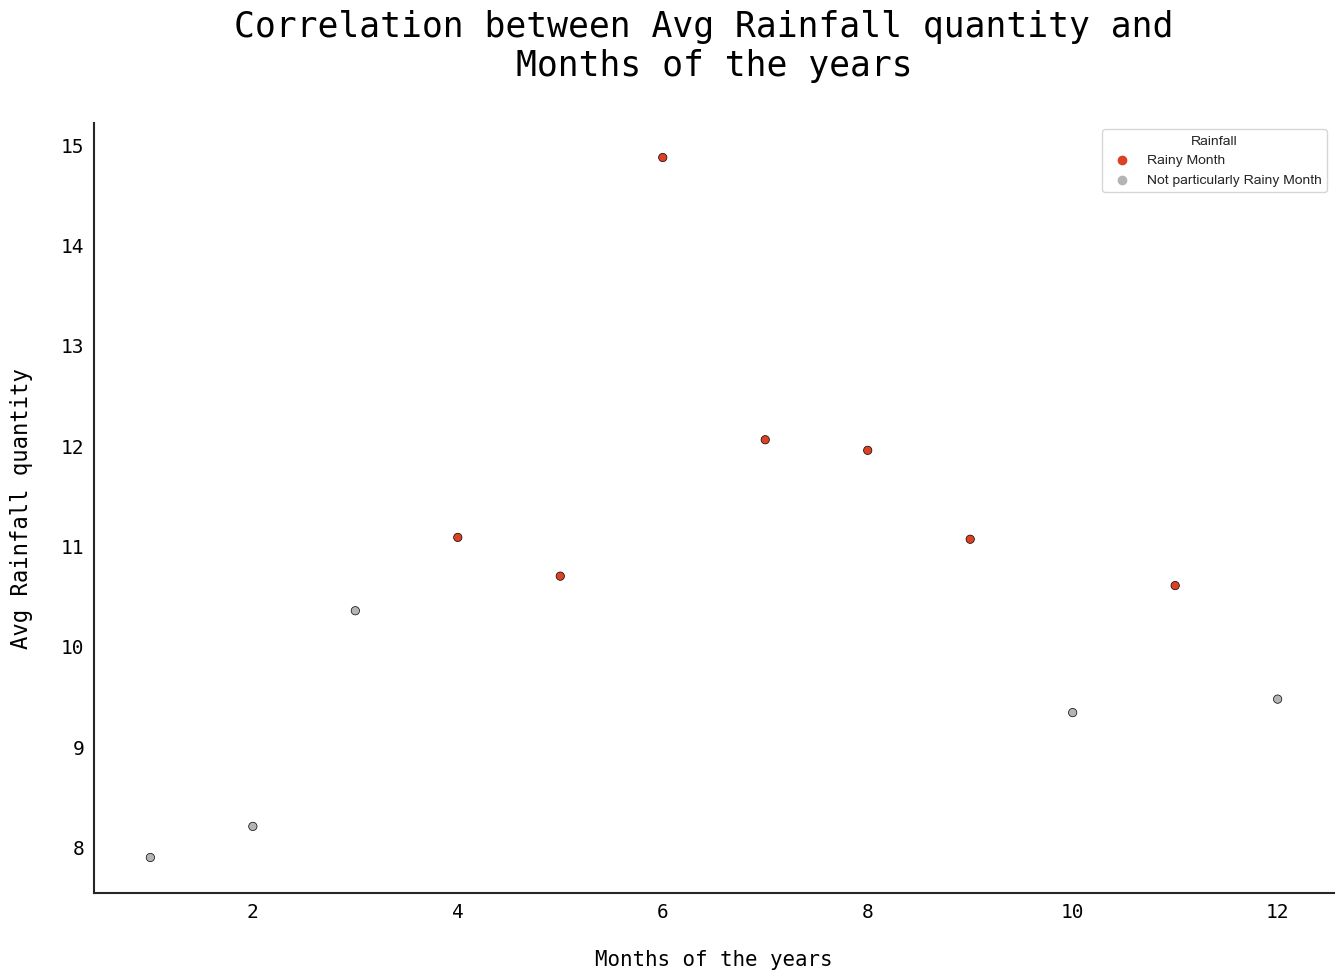

In [43]:
plt.figure(figsize = (16, 10))
sns.set_style("white")
plt.title('''Correlation between Avg Rainfall quantity and 
Months of the years''', size = 25, y = 1.05, fontname = 'monospace', color = 'black', ha = 'center')
a = sns.scatterplot(data = third_task_MoM, x = "month_of_date", y = "DlySum", 
                    hue = "Rainfall", 
                    palette = ['#dd4124', '#b4b4b4'], #, '#009473', '#336b87'
                    sizes = (1, 7), linewidth = 0.5, edgecolor = "black")
plt.xticks(fontname = 'monospace', size = 14, color = 'black')
plt.yticks(fontname = 'monospace', size = 14, color = 'black')
plt.xlabel('Months of the years', labelpad = 20, fontname = 'monospace', fontsize = 15, color = 'black')
plt.ylabel('Avg Rainfall quantity', labelpad = 20, fontname = 'monospace', fontsize = 16, color = 'black')


for j in ['right', 'top']:
        a.spines[j].set_visible(False)
for j in ['bottom', 'left']:
    a.spines[j].set_linewidth(1.5)
    
plt.show()

## DAYS TREND

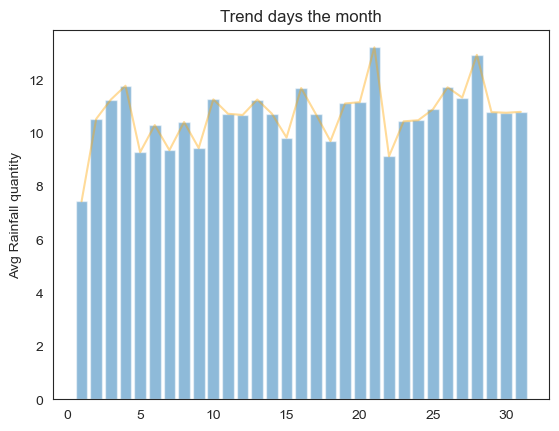

In [44]:
y_pos = third_task_DoD['day_of_date']
x_pos = third_task_DoD['DlySum']

plt.bar(y_pos, x_pos, align='center', alpha=0.5)
plt.plot(y_pos, x_pos, alpha=0.4, color='orange')

plt.ylabel('Avg Rainfall quantity')
plt.title('Trend days the month')

plt.show()

In [45]:
third_task_DoD['DlySum'].mean()

10.678944151240746

In [46]:
# ADD EXTRA COLUMN FOR LABELLING third_task_DoD
third_task_DoD.loc[third_task_DoD['DlySum'] >= 10.7, 'Rainfall'] = 'Rainy Day' 
third_task_DoD.loc[third_task_DoD['DlySum'] < 10.7, 'Rainfall'] = 'Not particularly Rainy' 

# with pd.option_context("display.max_columns", None):
#     display(third_task_DoD)

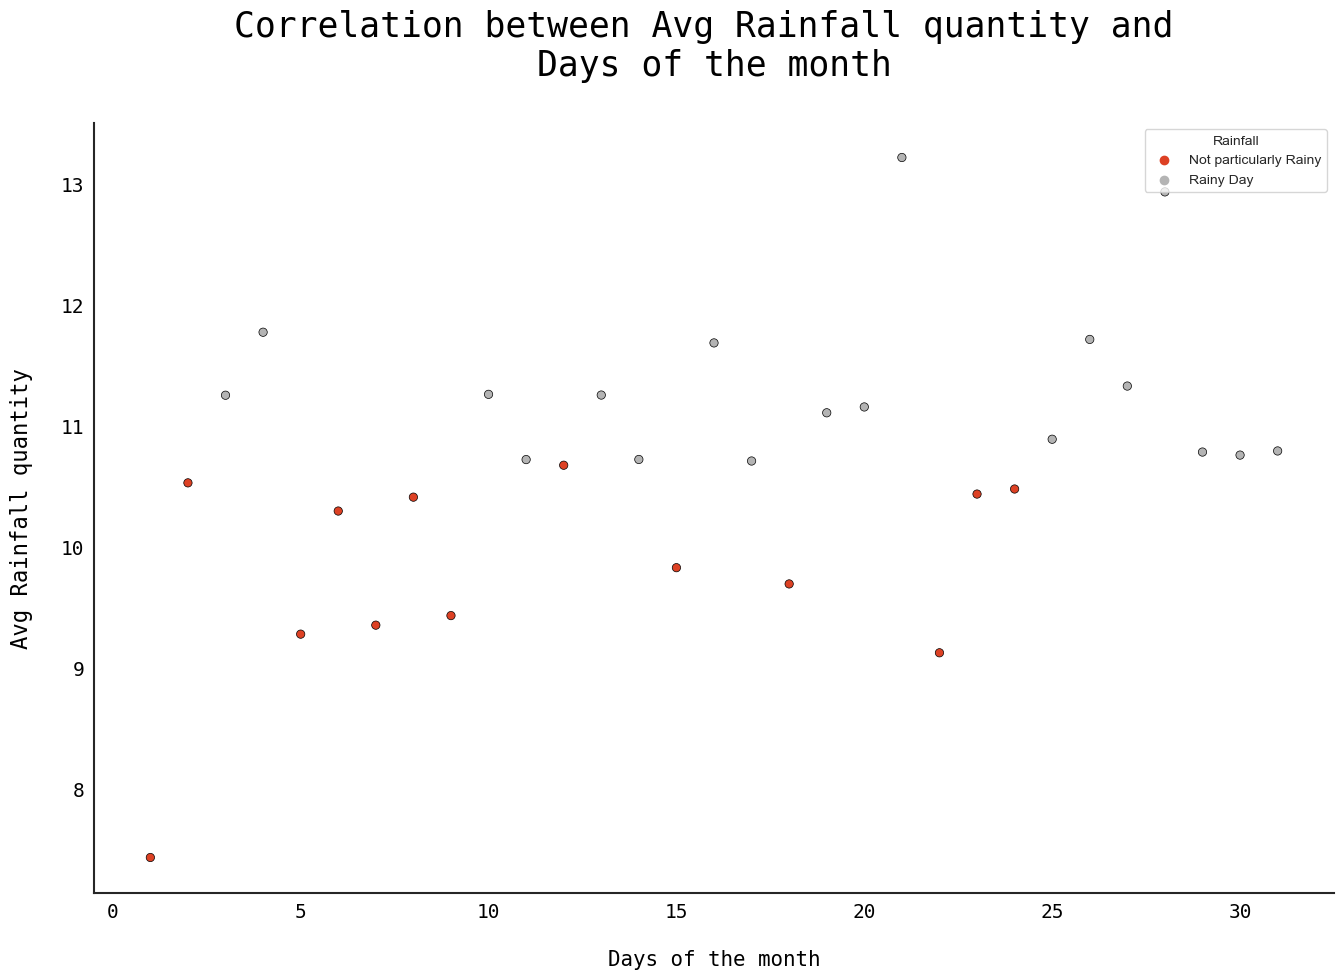

In [47]:
plt.figure(figsize = (16, 10))
sns.set_style("white")
plt.title('''Correlation between Avg Rainfall quantity and 
Days of the month''', size = 25, y = 1.05, fontname = 'monospace', color = 'black', ha = 'center')
a = sns.scatterplot(data = third_task_DoD, x = "day_of_date", y = "DlySum", 
                    hue = "Rainfall", 
                    palette = ['#dd4124', '#b4b4b4'], #, '#009473', '#336b87'
                    sizes = (1, 7), linewidth = 0.5, edgecolor = "black")
plt.xticks(fontname = 'monospace', size = 14, color = 'black')
plt.yticks(fontname = 'monospace', size = 14, color = 'black')
plt.xlabel('Days of the month', labelpad = 20, fontname = 'monospace', fontsize = 15, color = 'black')
plt.ylabel('Avg Rainfall quantity', labelpad = 20, fontname = 'monospace', fontsize = 16, color = 'black')


for j in ['right', 'top']:
        a.spines[j].set_visible(False)
for j in ['bottom', 'left']:
    a.spines[j].set_linewidth(1.5)
    
plt.show()